In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [45]:
df=pd.read_csv(r'D:\Data_Science\Python\ass\ass2\Ecommerce - UK Retailer.csv',encoding='unicode_escape')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [48]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month
df['Year_Month']=df.InvoiceDate.map(lambda x: 100*x.year + x.month)
df['Day']=(df.InvoiceDate.dt.dayofweek)+1
df['Hour']=df.InvoiceDate.dt.hour
df['Revenue']=df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Year_Month,Day,Hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012,3,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012,3,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012,3,8,20.34


# 1. Perform Basic EDA

    a. Boxplot – All Numeric Variables

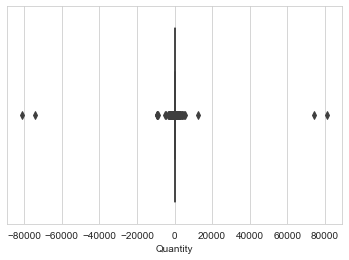

In [49]:
sns.boxplot(x=df['Quantity'])
plt.show()

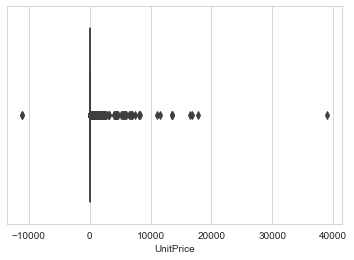

In [50]:
sns.boxplot(x=df['UnitPrice'])
plt.show()

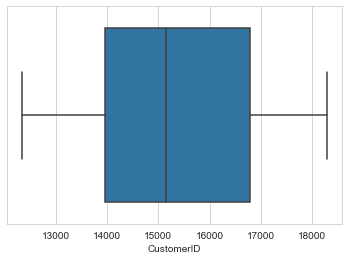

In [51]:
sns.boxplot(x=df['CustomerID'])
plt.show()

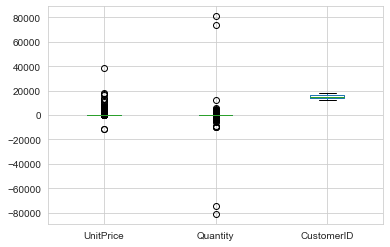

In [52]:
df.boxplot(column=["UnitPrice","Quantity","CustomerID"]);

    b. Histogram – All Numeric Variables

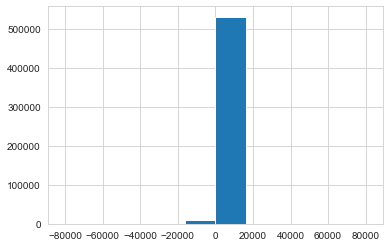

In [53]:
plt.hist(df["Quantity"])
plt.show;

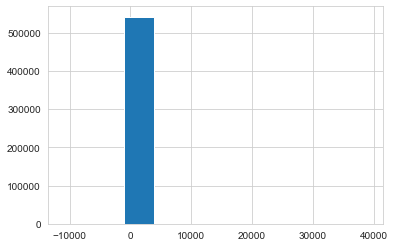

In [54]:
plt.hist(df["UnitPrice"])
plt.show;

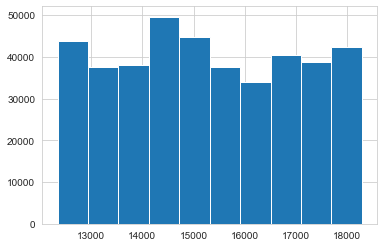

In [55]:
plt.hist(df["CustomerID"])
plt.show;

    c. Distribution Plot – All Numeric Variables

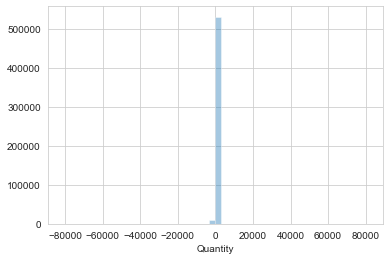

In [56]:
sns.distplot(df.Quantity,kde=False);

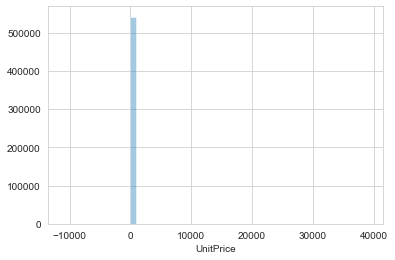

In [57]:
sns.distplot(df.UnitPrice,kde=False);

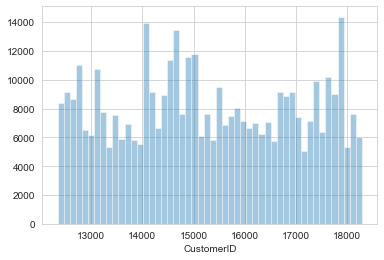

In [58]:
sns.distplot(df.CustomerID,kde=False);

    d. Aggregation for all numerical Columns

In [59]:
df.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,Year_Month,Day,Hour,Revenue
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,2010.921609,7.553128,201099.713989,3.431277,13.078729,17.987795
std,218.081158,96.759853,1713.600303,0.268787,3.509055,25.788703,1.844709,2.443270,378.810824
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,201012.000000,1.000000,6.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,2011.000000,5.000000,201103.000000,2.000000,11.000000,3.400000
50%,3.000000,2.080000,15152.000000,2011.000000,8.000000,201107.000000,3.000000,13.000000,9.750000
75%,10.000000,4.130000,16791.000000,2011.000000,11.000000,201110.000000,5.000000,15.000000,17.400000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,201112.000000,7.000000,20.000000,168469.600000


In [60]:
k=df[['Quantity','UnitPrice','CustomerID']]

In [61]:
k.head()

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0


In [62]:
k.sum()

Quantity      5.176450e+06
UnitPrice     2.498804e+06
CustomerID    6.219476e+09
dtype: float64

In [63]:
k.median()

Quantity          3.00
UnitPrice         2.08
CustomerID    15152.00
dtype: float64

In [64]:
k.mode()

,Quantity,UnitPrice,CustomerID
0,1,1.25,17841.0


    e. Unique Values across all columns

In [65]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
Year               2
Month             12
Year_Month        13
Day                6
Hour              15
Revenue         6204
dtype: int64

In [66]:
for i in df:
    print(df[i].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

    f. Duplicate values across all columns

In [67]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Year_Month,Day,Hour,Revenue
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,2010,12,201012,3,11,1.25
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2010,12,201012,3,11,2.10
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2010,12,201012,3,11,2.95
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,2010,12,201012,3,11,4.95
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2010,12,201012,3,11,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,2011,12,201112,5,11,0.39
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2011,12,201112,5,11,2.49
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,2011,12,201112,5,11,1.95
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2011,12,201112,5,11,2.10


    g. Correlation – Heatmap - All Numeric Variables

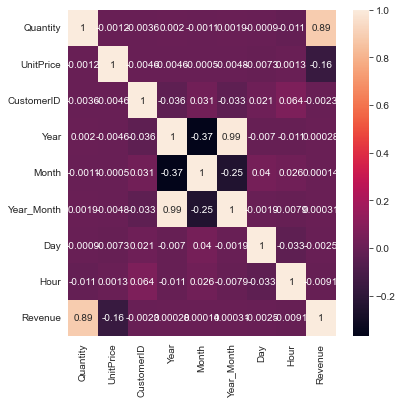

In [68]:
fig,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

    h. Regression Plot - All Numeric Variables

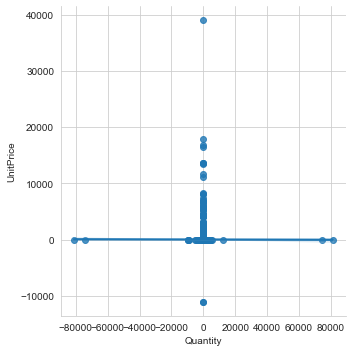

In [69]:
sns.lmplot(x ='Quantity', y ='UnitPrice', data = df)
plt.show()

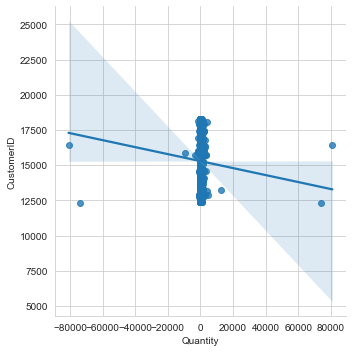

In [70]:
sns.lmplot(x ='Quantity', y ='CustomerID', data = df)
plt.show()

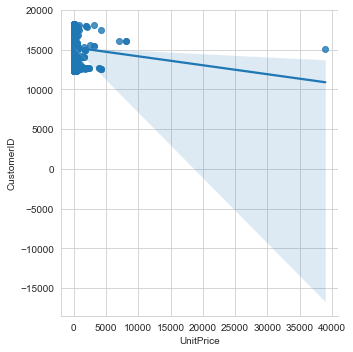

In [71]:
sns.lmplot(x ='UnitPrice', y ='CustomerID', data = df)
plt.show()

    i. Bar Plot – Every Categorical Variable vs every Numerical Variable

    Quantity vs Country

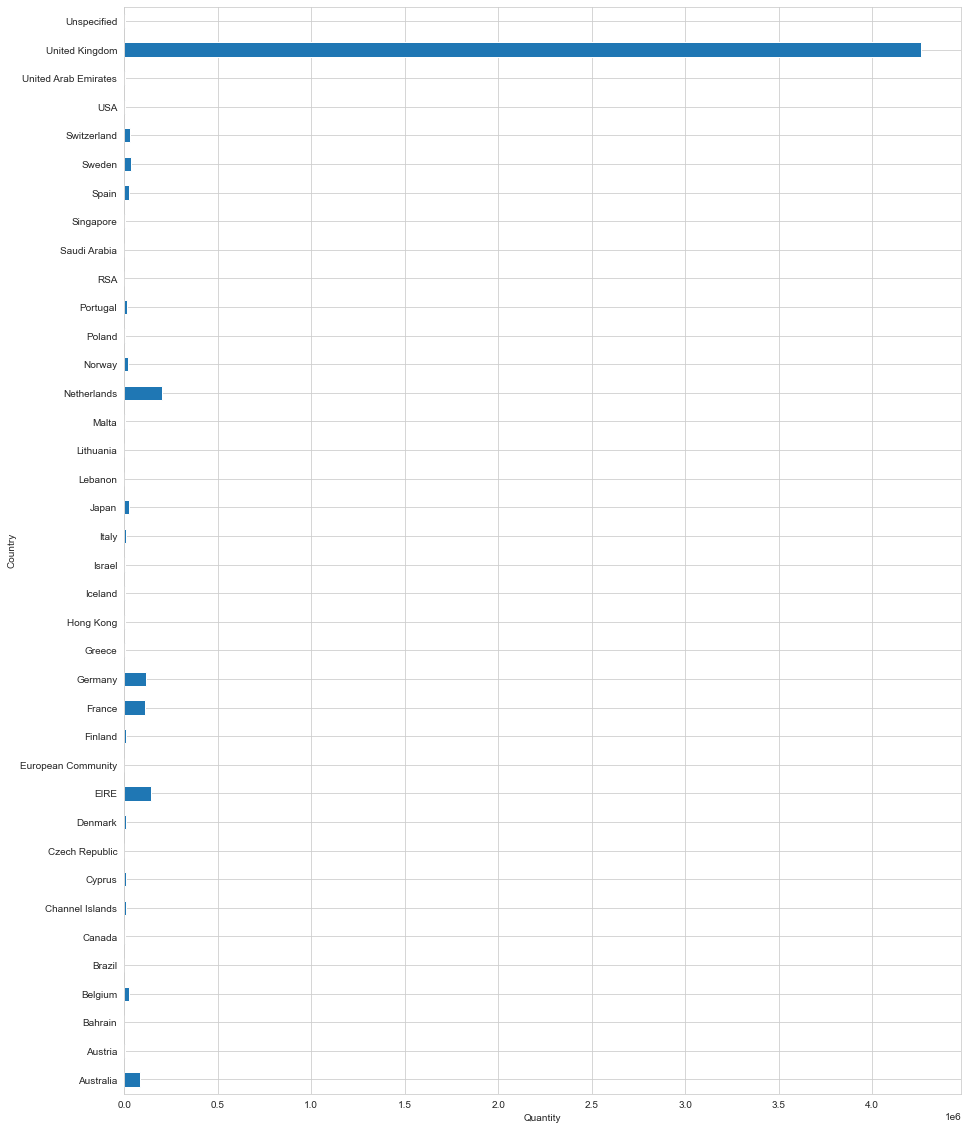

In [72]:
fig = plt.subplots(figsize=(15,20))
df.groupby(['Country'])['Quantity'].sum().plot.barh()
plt.xlabel('Quantity')
plt.show()

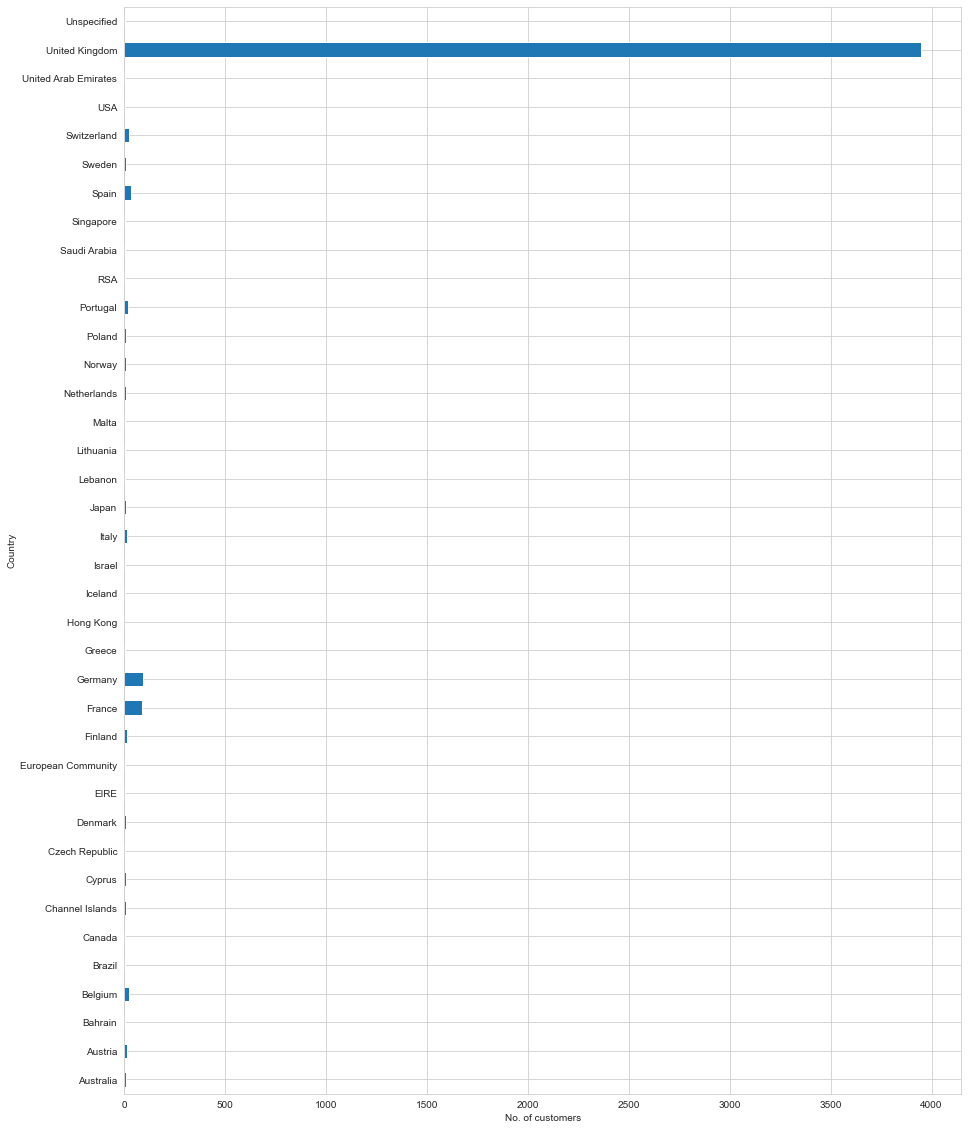

In [73]:
fig = plt.subplots(figsize=(15,20))
df.groupby(['Country'])['CustomerID'].nunique().plot.barh()
plt.xlabel('No. of customers')
plt.show()

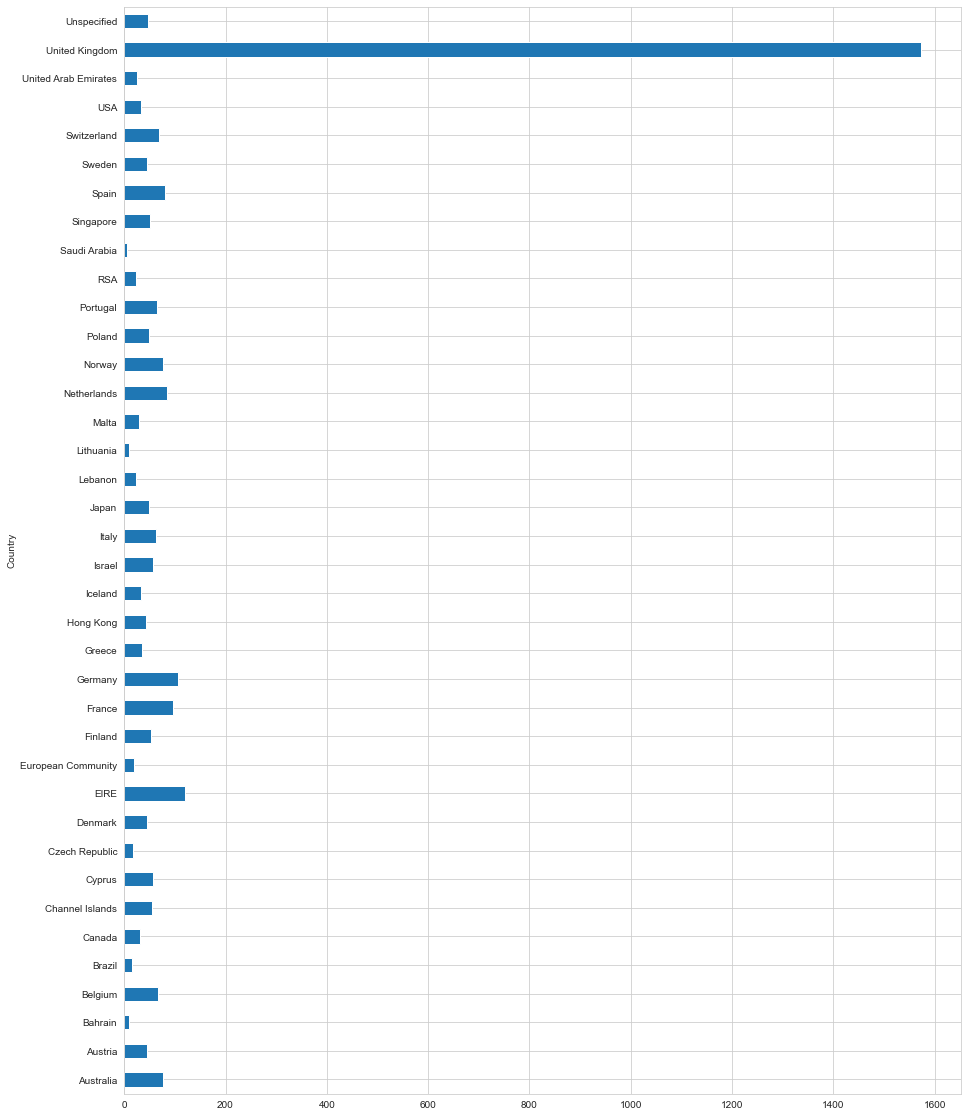

In [74]:
fig = plt.subplots(figsize=(15,20))
df.groupby(['Country'])['UnitPrice'].nunique().plot.barh()
plt.show()

    j. Pair plot - All Numeric Variables

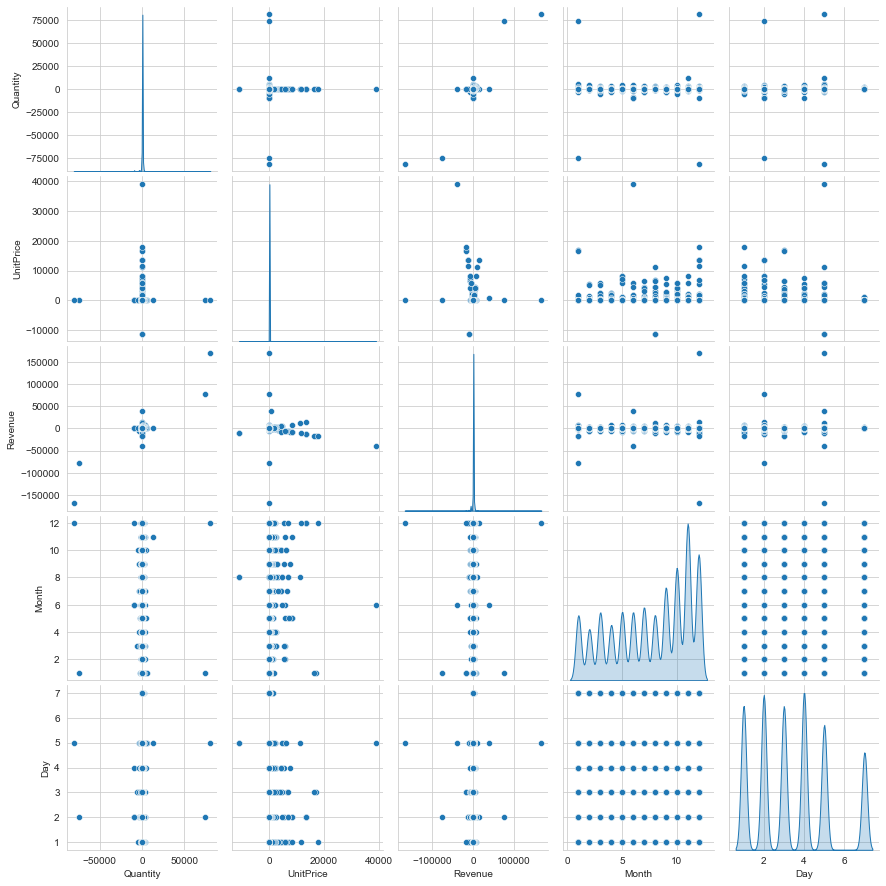

In [75]:
sns.pairplot(df,vars=['Quantity','UnitPrice','Revenue','Month','Day'],diag_kind='kde')
plt.show()

    k. Line chart to show the trend of data - All Numeric/Date Variables

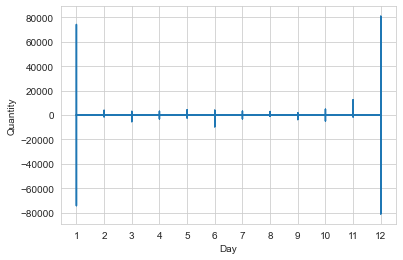

In [76]:
plt.plot(df['Month'],df['Quantity'])
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.xticks(np.arange(min(df['Month']), max(df['Month'])+1,1))
plt.show()

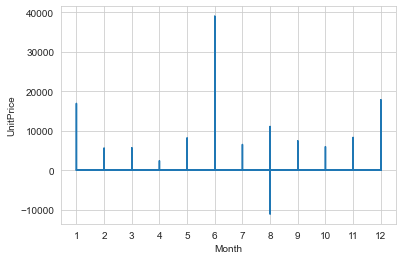

In [77]:
plt.plot(df['Month'],df['UnitPrice'])
plt.xlabel('Month')
plt.ylabel('UnitPrice')
plt.xticks(np.arange(min(df['Month']), max(df['Month'])+1,1))
plt.show()

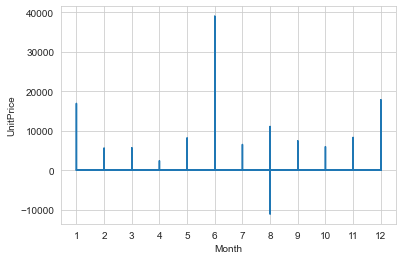

In [78]:
plt.plot(df['Month'],df['UnitPrice'])
plt.xlabel('Month')
plt.ylabel('UnitPrice')
plt.xticks(np.arange(min(df['Month']), max(df['Month'])+1,1))
plt.show()

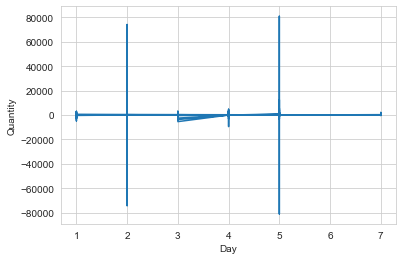

In [79]:
plt.plot(df['Day'],df['Quantity'])
plt.xlabel('Day')
plt.ylabel('Quantity')
plt.show()

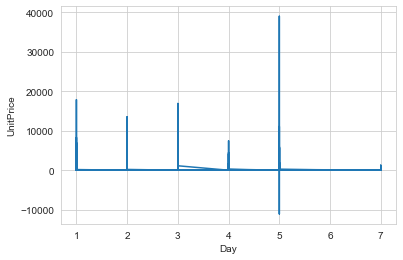

In [80]:
plt.plot(df['Day'],df['UnitPrice'])
plt.xlabel('Day')
plt.ylabel('UnitPrice')
plt.show()

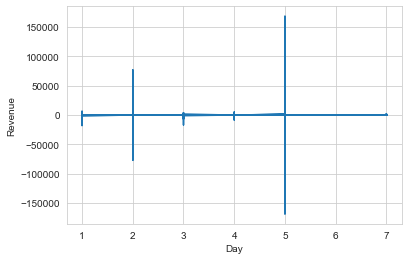

In [81]:
plt.plot(df['Day'],df['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

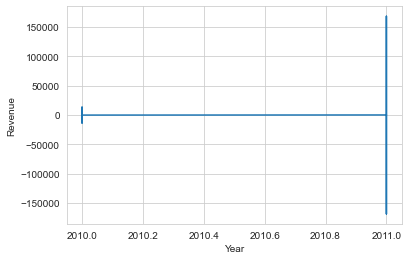

In [82]:
plt.plot(df['Year'],df['Revenue'])
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

    l. Plot the skewness - All Numeric Variables

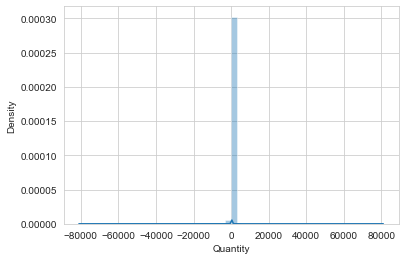

The skewness of this distribution is -0.2640763070668848


In [83]:
sns.distplot(df['Quantity'])
plt.show()
print('The skewness of this distribution is',df['Quantity'].skew())

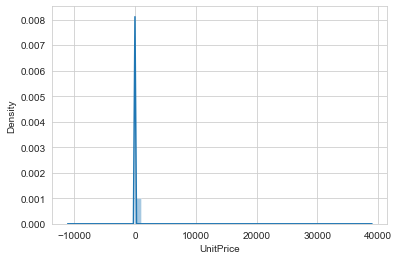

The skewness of this distribution is 186.50697172054137


In [84]:
sns.distplot(df['UnitPrice'])
plt.show()
print('The skewness of this distribution is',df['UnitPrice'].skew())

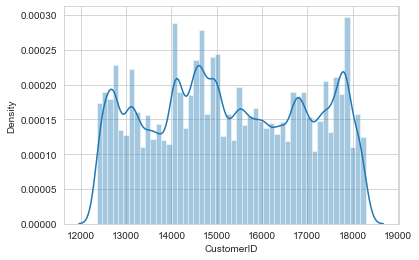

The skewness of this distribution is 0.02983499005167725


In [85]:
sns.distplot(df['CustomerID'])
plt.show()
print('The skewness of this distribution is',df['CustomerID'].skew())

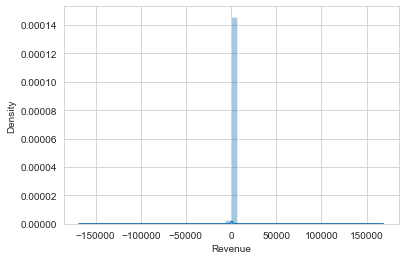

The skewness of this distribution is -0.9643891765708785


In [86]:
sns.distplot(df['Revenue'])
plt.show()
print('The skewness of this distribution is',df['Revenue'].skew())